# Topics Covered
-   Image Transformation

# **Image Transformations**

### **1. Upscaling image by factor of k**
Label images can be scaled using transformation matrices. We use homogenous coordinates for transformation. The transformation matrix used for scaling is:
$$ T = \begin{bmatrix} S_x& 0&t_x\\ 0 &S_y&t_y \\ 0&0&1\end{bmatrix} $$

To obtain the scaled coordinates, the original coordinates are multiplied by transformation matrix.
$$\begin{bmatrix}x'\\y'\\1 \end{bmatrix} = T * \begin{bmatrix}x\\y\\1 \end{bmatrix}$$

To fill in the missing values of coordinates, we can use:
 - Interpolation
 - Pooling


#### Forward vs Backward Mapping

### **2. Rotate by angle of theta**

Images can be rotated using rotation matrices. The transformation matrix used for rotation is:
$$ R = \begin{bmatrix} \cos{\theta}& -\sin{\theta}&0\\ \sin{\theta} &\cos{\theta}&0 \\ 0&0&1\end{bmatrix} $$


To obtain the pixel values after rotation, we resample from the original image using inverse transformations.

#### Forward vs Backward Mapping

Given an input image $I$, we can apply a transformation $T$on the input image and get the output $O$ as $O=T(I)$. However, this has a limitation that after applying $T$ on $I$, the resultant values might be floating numbers, or might be numbers which lie out of bounds of the output image size. We can solve the latter by ignoring the values lying out of bounds, and the former by rounding the resultant values. However, rounding the values leads to an issue that some pixels in the output image might get not addressed at all, and this might lead to "holes" in the output image. To address this problem, a process called "Backward Mapping" is used. Where, we iterate over all pixels of the output image, and use an inverse transformation $T^{-1}$ to get the corresponding pixel from the input image. This ensures that no pixel in the output image is left unattended. You can read more about it [here](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic2.htm#forward)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

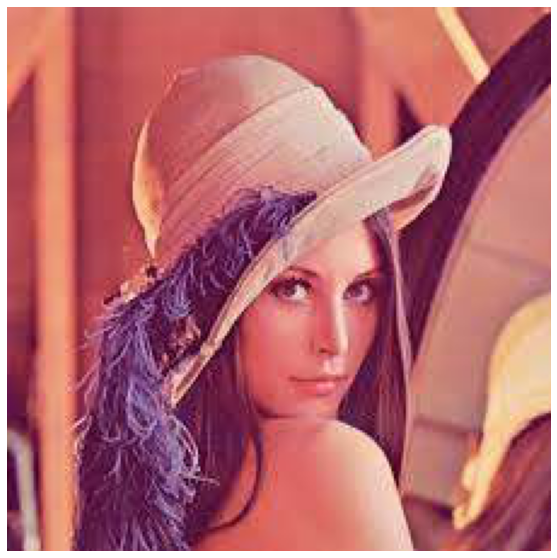

In [61]:
img = cv2.imread("../images/lenna.jpeg")
img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')
plt.show()

In [3]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

In [4]:
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([[np.cos(angle), -np.sin(angle), 0],[np.sin(angle),  np.cos(angle), 0],[0, 0, 1] ])

In [5]:
def get_translation(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1] ])

In [6]:
def get_scale(sx,sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1] ])

In [7]:
def rotate(img,theta, retain = False):
    h,w,_= img.shape
    tx, ty = np.array((w  // 2, h  // 2))
    angle = np.radians(theta)

    if(retain==False):
        R = get_rotation(theta)
        T = get_translation(tx,ty)

        op_matrix = T @ R   @ np.linalg.inv(T)


        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)
        x2, y2 = coords[0], coords[1]
        warp_coords = (op_inv@coords).astype(np.int32)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) &
                           (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]

    else:
        R = get_rotation(theta)
        T = get_translation(tx,ty)

        op_matrix = T @ R  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]

        x_min = min(x1)
        x_max = max(x1)
        y_min = min(y1)
        y_max = max(y1)
        nh = x_max-x_min
        nw = y_max-y_min


        sx = h/nh
        sy = w/nw

        S = get_scale(sx,sy)
        op_matrix = T @ R @ S  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) & (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]



    return canvas

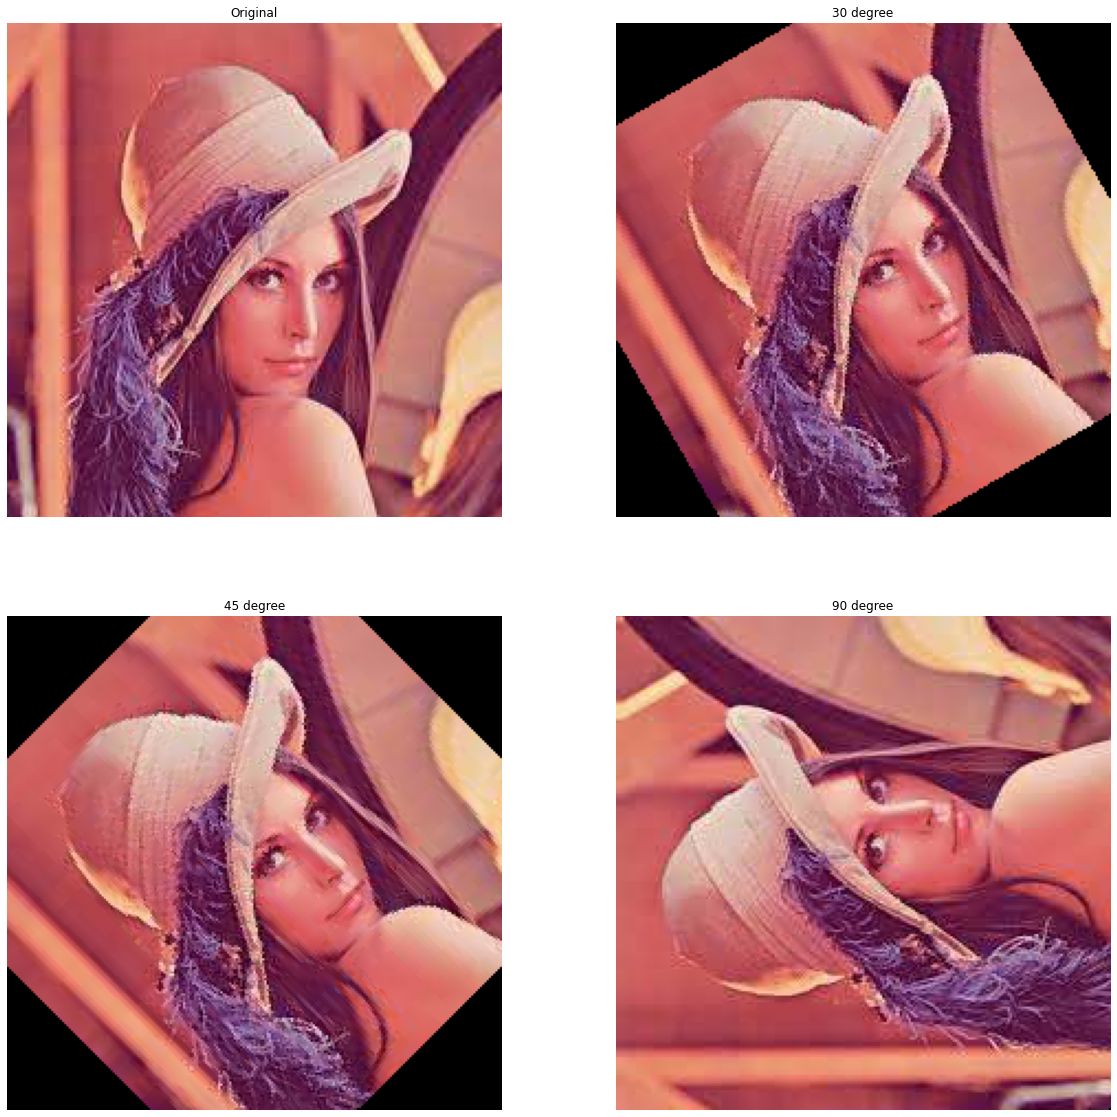

In [60]:
#Rotate images
rot_img_30= rotate(img,30)
rot_img_45= rotate(img,45)
rot_img_90= rotate(img,90)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax.set_title("Original")
ax.imshow( img)
ax.axis('off')

ax = fig.add_subplot(222)
ax.set_title("30 degree")
ax.imshow(rot_img_30)
ax.axis('off')

ax = fig.add_subplot(223)
ax.set_title("45 degree")
ax.imshow(rot_img_45)
ax.axis('off')

ax = fig.add_subplot(224)
ax.set_title("90 degree")
ax.imshow(rot_img_90)
ax.axis('off')
plt.show()

Retain the whole image


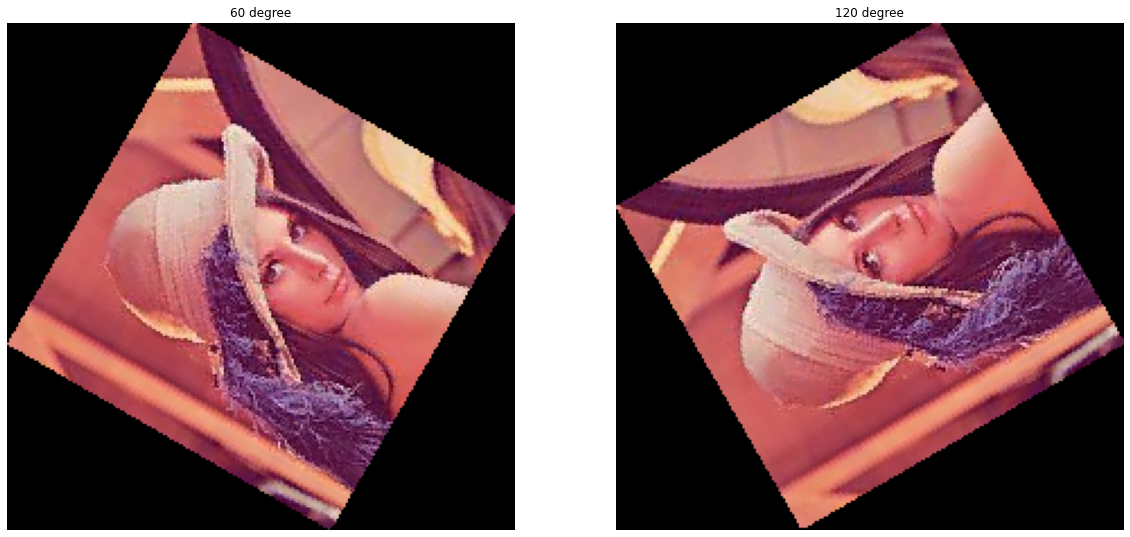

In [59]:
#Rotate image
print("Retain the whole image")
rot_img_60= rotate(img,60,True)
rot_img_120= rotate(img,120,True)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121)
ax.set_title("60 degree")
ax.imshow(rot_img_60)
ax.axis('off')

ax = fig.add_subplot(122)
ax.set_title("120 degree")
ax.imshow(rot_img_120)
ax.axis('off')

plt.show()

### **3. Reflection**

Just like Images can be rotated about an axis using a rotation matrix, they can also be reflected about an axis using a reflection matrix. All you  have to do, is to specify the right reflection matrix.The transformation matrix used for reflection is:

**Along X-Axis**
$$ R = \begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 &0 \\ 0 & 0 & 1\end{bmatrix} $$

**Along Y-Axis**
$$ R = \begin{bmatrix} -1 & 0 & 0 \\ 0 & 1 &0 \\ 0 & 0 & 1\end{bmatrix} $$

**Along y=x**
$$ R = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} $$

**Along y=-x**
$$ R = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} $$

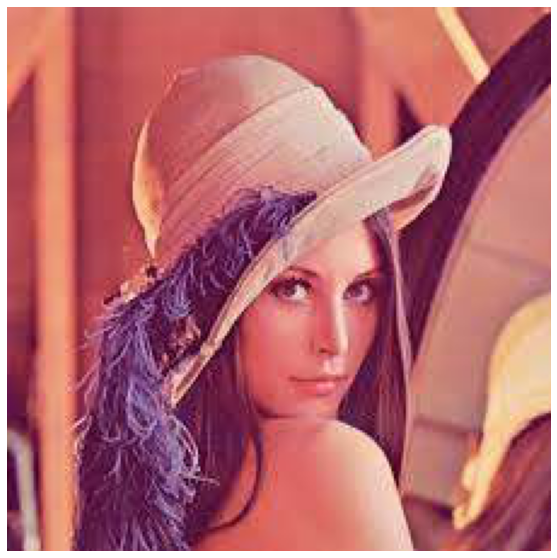

In [58]:
img = cv2.imread("../images/lenna.jpeg")
img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')
plt.show()

In [44]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

def get_reflection(axis):
    if axis == 'Y':
        return np.array([[1,0,0],[0,-1, 0],[0,0,1] ])
    if axis == 'X':
        return np.array([[-1,0,0],[0,1, 0],[0,0,1] ])
    if axis == 'y_equal_x' or axis == 'x_equal_y':
        return np.array([[0,1,0],[1,0,0],[0,0,1] ])
    
def get_translation(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1] ])

def get_scale(sx,sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1] ])

def reflect(img, axis, retain = False):
    h,w,_= img.shape
    tx, ty = np.array((w  // 2, h  // 2))

    if(retain==False):
        R = get_reflection(axis)
        T = get_translation(tx,ty)

        op_matrix = T @ R   @ np.linalg.inv(T)


        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)
        x2, y2 = coords[0], coords[1]
        warp_coords = (op_inv@coords).astype(np.int32)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) &
                           (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]

    else:
        R = get_reflection(axis)
        T = get_translation(tx,ty)

        op_matrix = T @ R  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]

        x_min = min(x1)
        x_max = max(x1)
        y_min = min(y1)
        y_max = max(y1)
        nh = x_max-x_min
        nw = y_max-y_min


        sx = h/nh
        sy = w/nw

        S = get_scale(sx,sy)
        op_matrix = T @ R @ S  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) & (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]



    return canvas

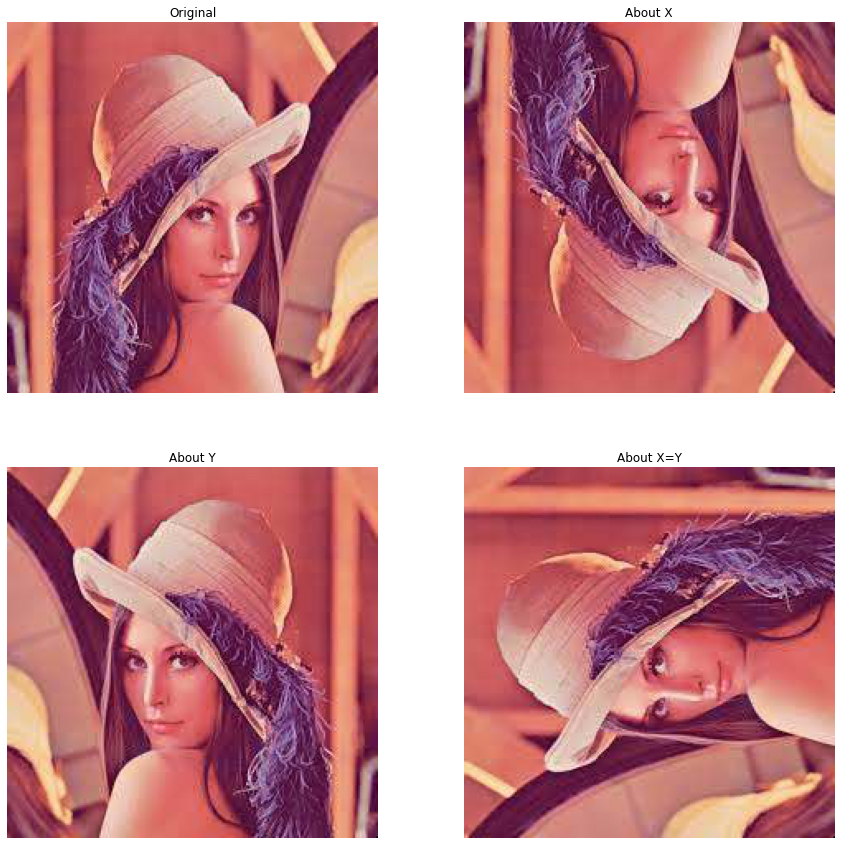

In [57]:
#Reflect images
reflectX= reflect(img, 'X', retain=True)
reflectY= reflect(img, 'Y', retain=True)
reflectX_equal_Y = reflect(img, 'y_equal_x', retain=True)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
ax.set_title("Original")
ax.imshow( img)
ax.axis('off')

ax = fig.add_subplot(222)
ax.set_title("About X")
ax.imshow(reflectX)
ax.axis('off')

ax = fig.add_subplot(223)
ax.set_title("About Y")
ax.imshow(reflectY)
ax.axis('off')

ax = fig.add_subplot(224)
ax.set_title("About X=Y")
ax.imshow(reflectX_equal_Y)
ax.axis('off')
plt.show()

### 4. Shearing

Shearing deals with changing the shape and size of the 2D object along x-axis and y-axis. It is similar to sliding the layers in one direction to change the shape of the 2D object.It is an ideal technique to change the shape of an existing object in a two dimensional plane (Definition taken from [geeksforgeeks](https://www.geeksforgeeks.org/shearing-in-2d-graphics/) )
<br/>
![](https://static.javatpoint.com/tutorial/computer-graphics/images/computer-graphics-shearing2.png)

**Shearing Matrix**
$$ S = \begin{bmatrix} 1 & Sx & 0 \\ Sy & 1 &0 \\ 0 & 0 & 1\end{bmatrix} $$
where $Sx$ represents shear value along X axis and $Sy$ represents shear value along Y axis


In [37]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

def get_shear(Sx, Sy):
    op_matrix = np.eye(3)
    op_matrix[1,0] = Sx
    op_matrix[0,1] = Sy
    return op_matrix

def get_translation(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1] ])

def get_scale(sx,sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1] ])

def shear(img, Sx, Sy, retain = False):
    h,w,_= img.shape
    tx, ty = np.array((w  // 2, h  // 2))

    if(retain==False):
        R = get_shear(Sx, Sy)
        T = get_translation(tx,ty)

        op_matrix = T @ R   @ np.linalg.inv(T)


        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)
        x2, y2 = coords[0], coords[1]
        warp_coords = (op_inv@coords).astype(np.int32)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) &
                           (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]

    else:
        R = get_shear(Sx, Sy)
        T = get_translation(tx,ty)

        op_matrix = T @ R  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]

        x_min = min(x1)
        x_max = max(x1)
        y_min = min(y1)
        y_max = max(y1)
        nh = x_max-x_min
        nw = y_max-y_min


        sx = h/nh
        sy = w/nw

        S = get_scale(sx,sy)
        op_matrix = T @ R @ S  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) & (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]



    return canvas

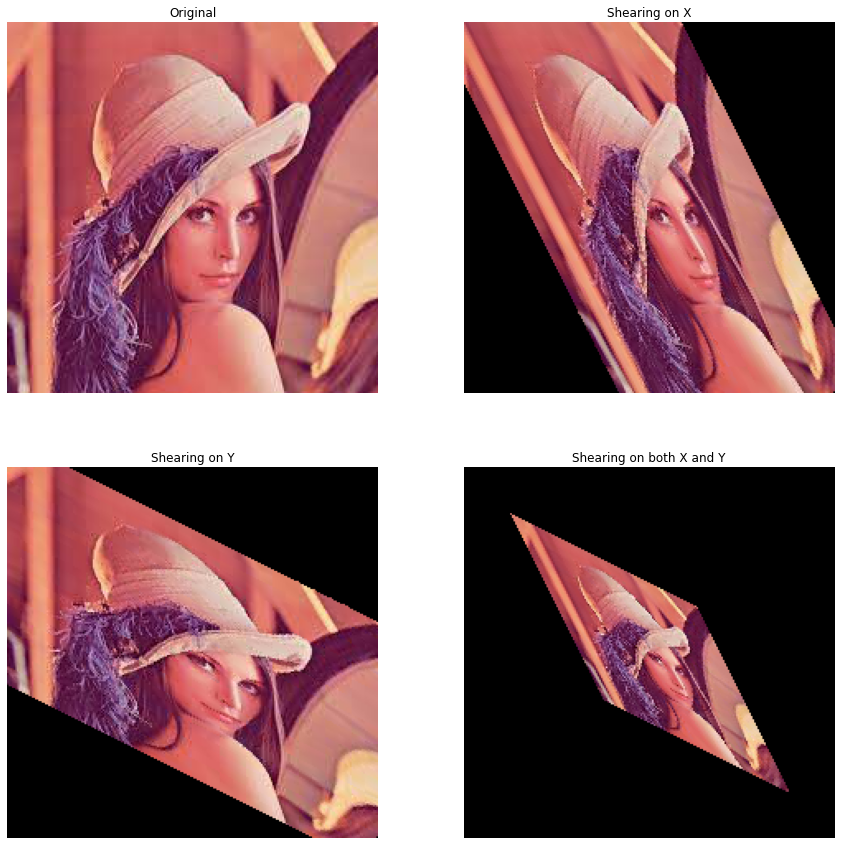

In [56]:
#Reflect images
shearX= shear(img, Sx=0.5, Sy=0, retain=True)
shearY= shear(img, Sx=0, Sy=0.5, retain=True)
shearXY= shear(img, Sx=0.5, Sy=0.5, retain=True)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
ax.set_title("Original")
ax.imshow(img)
ax.axis('off')

ax = fig.add_subplot(222)
ax.set_title("Shearing on X")
ax.imshow(shearX)
ax.axis('off')

ax = fig.add_subplot(223)
ax.set_title("Shearing on Y")
ax.imshow(shearY)
ax.axis('off')

ax = fig.add_subplot(224)
ax.set_title("Shearing on both X and Y")
ax.imshow(shearXY)
ax.axis('off')
plt.show()

### 5. Perspective Transform

Perspective Transforms deal with changing the angle/viewpoint of a given image to get better information about it. There is no fixed matrix to perform this. We need to calculate a matrix which takes a set of source points to a set of target points

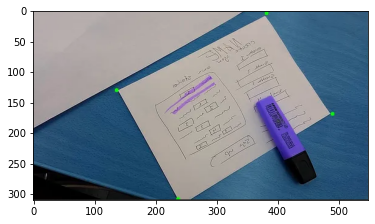

In [50]:
import cv2
from glob import glob
import matplotlib.pyplot as plt

paper = cv2.imread('../images/paper.png')
plt.imshow(paper)
plt.show()

In [79]:
M

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  0]])

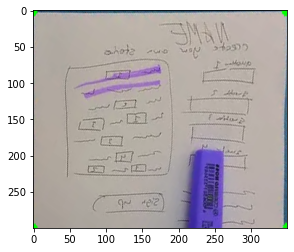

In [80]:
pts1 = np.float32([[138, 129],[380, 8],[240, 307],[488, 164]]) # Src points (Specified in [x,y])
pts2 = np.float32([[0,0],[350,0],[0,300],[350,300]]) # Target points (Specified in [x,y] order)

M = cv2.getPerspectiveTransform(pts1,pts2) # Finds the right matrix to take the src pts to the target pts
dst = cv2.warpPerspective(paper,M,(350,300)) # Transform the image using the matrix M (similar to how we were transforming images above)

for val in pts1:
    cv2.circle(paper, (int(val[0]),int(val[1])),5,(0,255,0),-1)
for val in pts2:
    cv2.circle(dst, (int(val[0]),int(val[1])),5,(0,255,0),-1)

plt.imshow(dst)
plt.show()